<IPython.core.display.Javascript object>


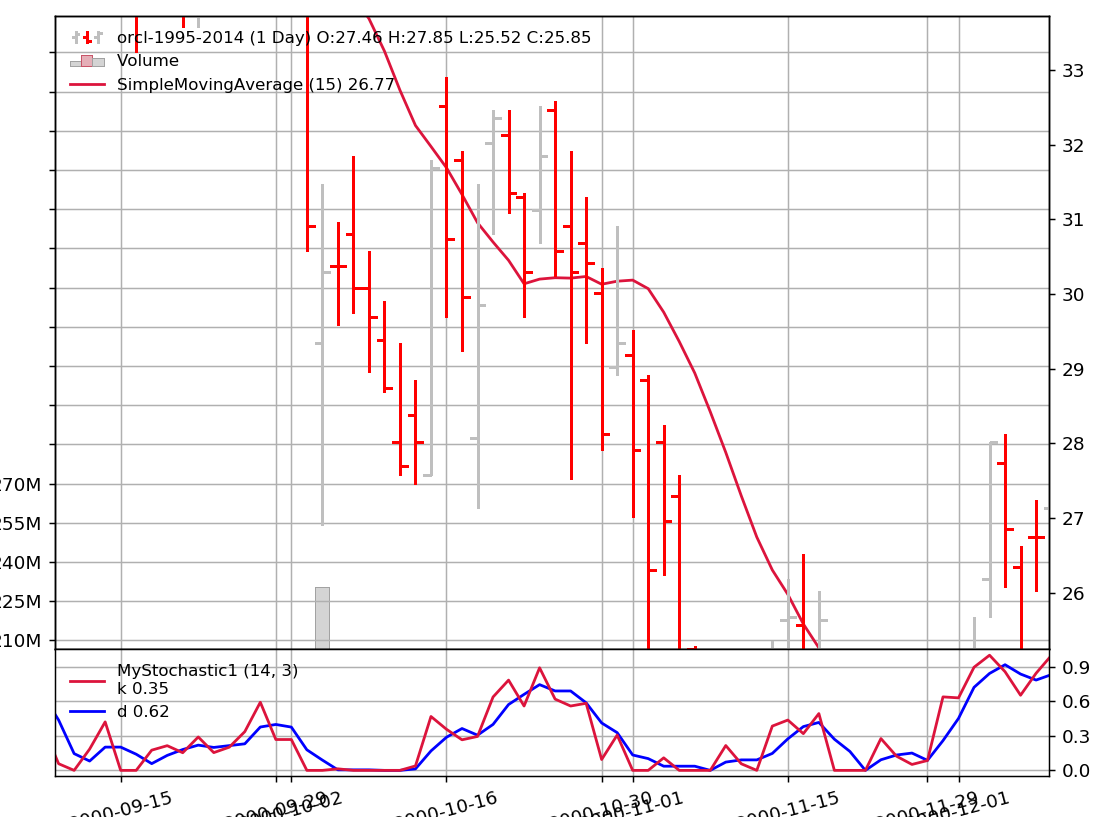

In [4]:
%matplotlib notebook
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  
import os.path  
import sys  # To find out the script name (in argv[0])


import backtrader as bt


class MyStochastic1(bt.Indicator):
    
    lines = ('k', 'd', )  # プロットに表示するlinesオブジェクト
    params = (
        ('k_period', 14), # パラメーターをタプルのタプルで指定する
        ('d_period', 3),  # タプルの最後にもコンマ(、)をいれる
    )
    
    def __init__(self):
        
        highest = bt.indicators.Highest(self.data, period=self.p.k_period)      # 組み込みのインジケーターHighestで最高値を計算
        lowest = bt.ind.Lowest(self.data, period=self.p.k_period)        # 正確にはself.datas[0]と書くが省略可能
                                                                         # self.params.k_periodを省略してself.p.k_period
        
        self.lines.k = k = (self.data - lowest) / (highest - lowest)    # つぎの計算のためself.lines.kをkに代入して簡略化
        self.lines.d = bt.ind.SMA(k, period=self.p.d_period)
        
        



class TestStrategy(bt.Strategy):
    #SMAのデフォルト設定を上書きするためのパラメータ   
    params = (
             ('maperiod', 15),   
    )
 
            
    def __init__(self):

        # 省略なし
        #self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.maperiod)
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=self.p.maperiod)
            
        #self.myind = MyStochastic1(self.datas[0])
        self.myind = MyStochastic1(self.data)    #インスタンス名myindの部分は任意
        
 
        
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
    cerebro.addstrategy(TestStrategy)

    
    
    datapath = 'C:\\Users\\shsh\\orcl-1995-2014.txt'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,        
        fromdate=datetime.datetime(2000, 1, 1),
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)


    cerebro.adddata(data)
    
    cerebro.run(stdstats=False)
    
    cerebro.plot(style='bar')

<IPython.core.display.Javascript object>


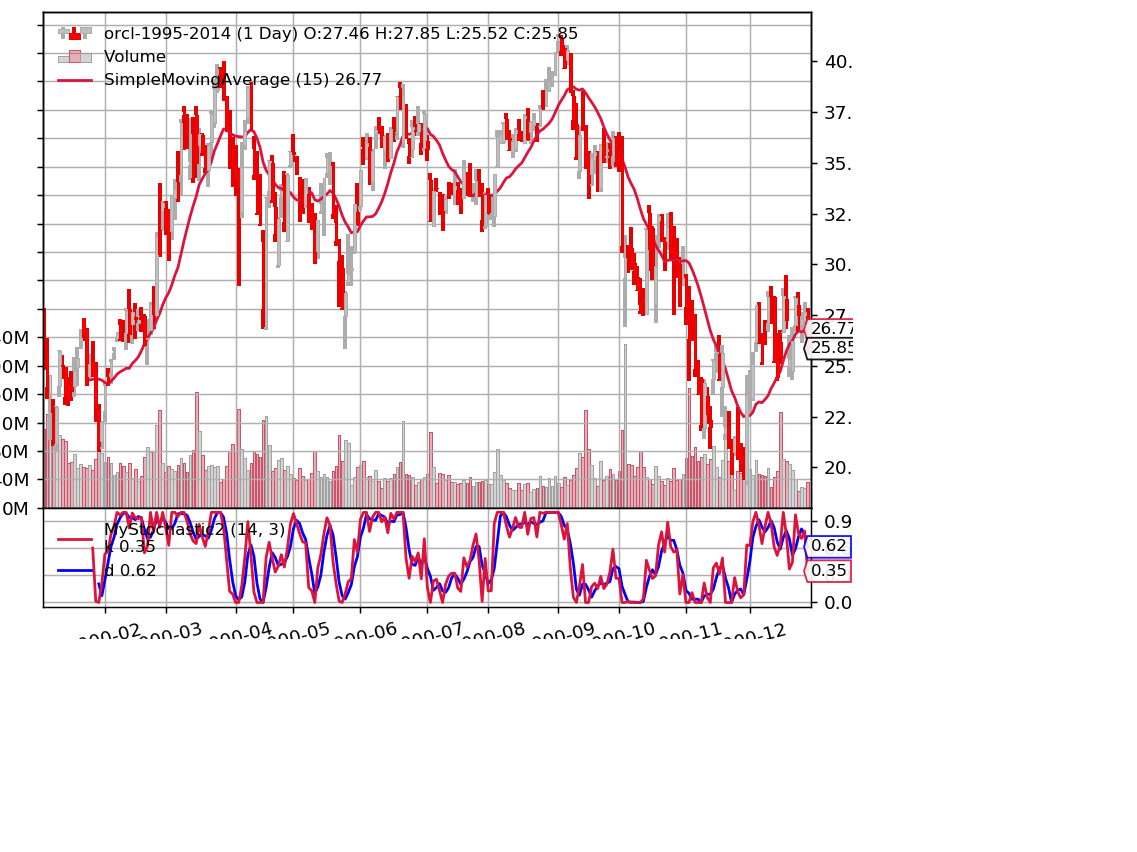

In [18]:
%matplotlib notebook
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  
import os.path  
import sys  # To find out the script name (in argv[0])


import backtrader as bt

# manually counted period
    # 14 for the fast moving k
    # 3 for the slow moving d
    # No extra for the previous k (-1) is needed because
    # already buffers more than the 1 period lookback
    # If we were doing d - d(-1), there is nothing making
    # sure k(-1) is being buffered and an extra 1 would be needed    

class MyStochastic2(bt.Indicator):
    lines = ('k', 'd', )
    
    params = (
        ('k_period', 14),  # lookback period for highest/lowest
        ('d_period', 3),  # smoothing period for d with the SMA
    )
    def __init__(self):
        self.addminperiod(self.p.k_period + self.p.d_period)    #addminperiod()はCerebroに記憶しておくBarの数を教える
        
    def next(self):
        # Get enough data points to calculate k and do it
        d = self.data.get(size=self.p.k_period)                 # get()はLinesオブジェクトのスライスするためのメソッド dは配列
        hi = max(d)
        lo = min(d)
        #self.lines.k[0] = k0 = (self.data[0] - lo) / (hi - lo)        
        #last_ks = self.l.k.get(size=self.p.d_period)            #self.lines.k を省略してself.l.k
        #self.lines.d[0] = sum(last_ks) / self.p.d_period        
        
        self.lines.k[0] = (self.data - lo) / (hi - lo)        
        last_ks = self.l.k.get(size=self.p.d_period)            #self.lines.k を省略してself.l.k
        self.lines.d[0] = sum(last_ks) / self.p.d_period        
        
        



class TestStrategy(bt.Strategy):
    #SMAのデフォルト設定を上書きするためのパラメータ   
    params = (
             ('maperiod', 15),   
    )
 
            
    def __init__(self):

        # 省略なし
        #self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.maperiod)
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=self.p.maperiod)
            
        #self.myind = MyStochastic1(self.datas[0])
        self.myind = MyStochastic2(self.data)    #インスタンス名myindの部分は任意
        
 
        
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
    cerebro.addstrategy(TestStrategy)

    
    
    datapath = 'C:\\Users\\shsh\\orcl-1995-2014.txt'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,        
        fromdate=datetime.datetime(2000, 1, 1),
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)


    cerebro.adddata(data)
    
    cerebro.run(stdstats=False)
    
    cerebro.plot(style='candle')

<IPython.core.display.Javascript object>


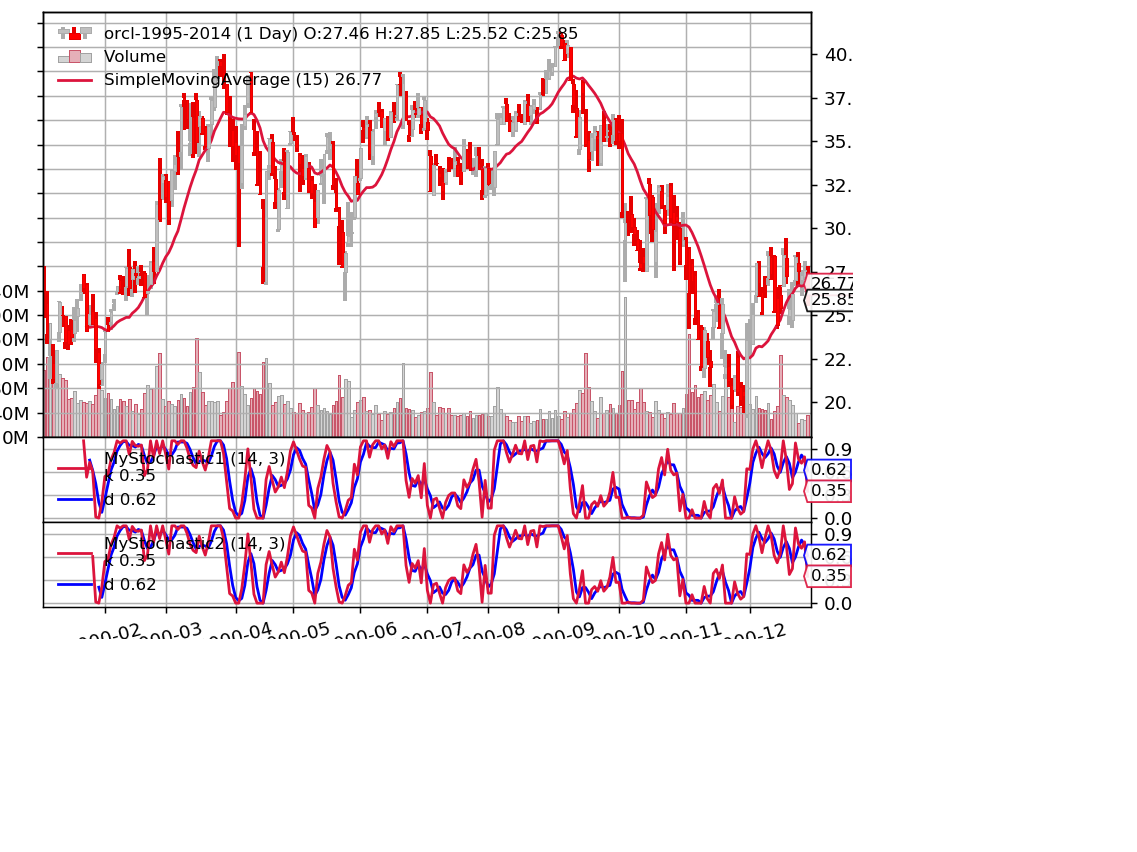

In [20]:
%matplotlib notebook
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  
import os.path  
import sys  # To find out the script name (in argv[0])


import backtrader as bt


class MyStochastic1(bt.Indicator):
    
    lines = ('k', 'd', )  # プロットに表示するlinesオブジェクト
    params = (
        ('k_period', 14), # パラメーターをタプルのタプルで指定する
        ('d_period', 3),  # タプルの最後にもコンマ(、)をいれる
    )
    
    def __init__(self):
        
        highest = bt.ind.Highest(self.data, period=self.p.k_period)      # 組み込みのインジケーターHighestで最高値を計算
        lowest = bt.ind.Lowest(self.data, period=self.p.k_period)        # 正確にはself.datas[0]と書くが省略可能
                                                                         # self.params.k_periodを省略してself.p.k_period
        
        self.lines.k = k = (self.data - lowest) / (highest - lowest)    # つぎの計算のためself.lines.kをkに代入して簡略化
        self.lines.d = bt.ind.SMA(k, period=self.p.d_period)

        
class MyStochastic2(bt.Indicator):
    lines = ('k', 'd', )
    
    params = (
        ('k_period', 14),  # lookback period for highest/lowest
        ('d_period', 3),  # smoothing period for d with the SMA
    )
    def __init__(self):
        self.addminperiod(self.p.k_period + self.p.d_period)    #addminperiod()はCerebroに記憶しておくBarの数を教える
        
    def next(self):
        # Get enough data points to calculate k and do it
        d = self.data.get(size=self.p.k_period)                 # get()はLinesオブジェクトのスライスするためのメソッド dは配列
        hi = max(d)
        lo = min(d)
        self.lines.k[0] = (self.data - lo) / (hi - lo)        
        last_ks = self.l.k.get(size=self.p.d_period)            #self.lines.k を省略してself.l.k
        self.lines.d[0] = sum(last_ks) / self.p.d_period        
        
        



class TestStrategy(bt.Strategy):
    #SMAのデフォルト設定を上書きするためのパラメータ   
    params = (
             ('maperiod', 15),   
    )
 
            
    def __init__(self):

        # 省略なし
        #self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.maperiod)
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=self.p.maperiod)
            
        #self.myind = MyStochastic1(self.datas[0])
        self.myind1 = MyStochastic1(self.data)    #インスタンス名myindの部分は任意
        self.myind2 = MyStochastic2(self.data)
 
        
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
    cerebro.addstrategy(TestStrategy)

    
    
    datapath = 'C:\\Users\\shsh\\orcl-1995-2014.txt'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,        
        fromdate=datetime.datetime(2000, 1, 1),
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)


    cerebro.adddata(data)
    
    cerebro.run(stdstats=False)
    
    cerebro.plot(style='candle')

<IPython.core.display.Javascript object>


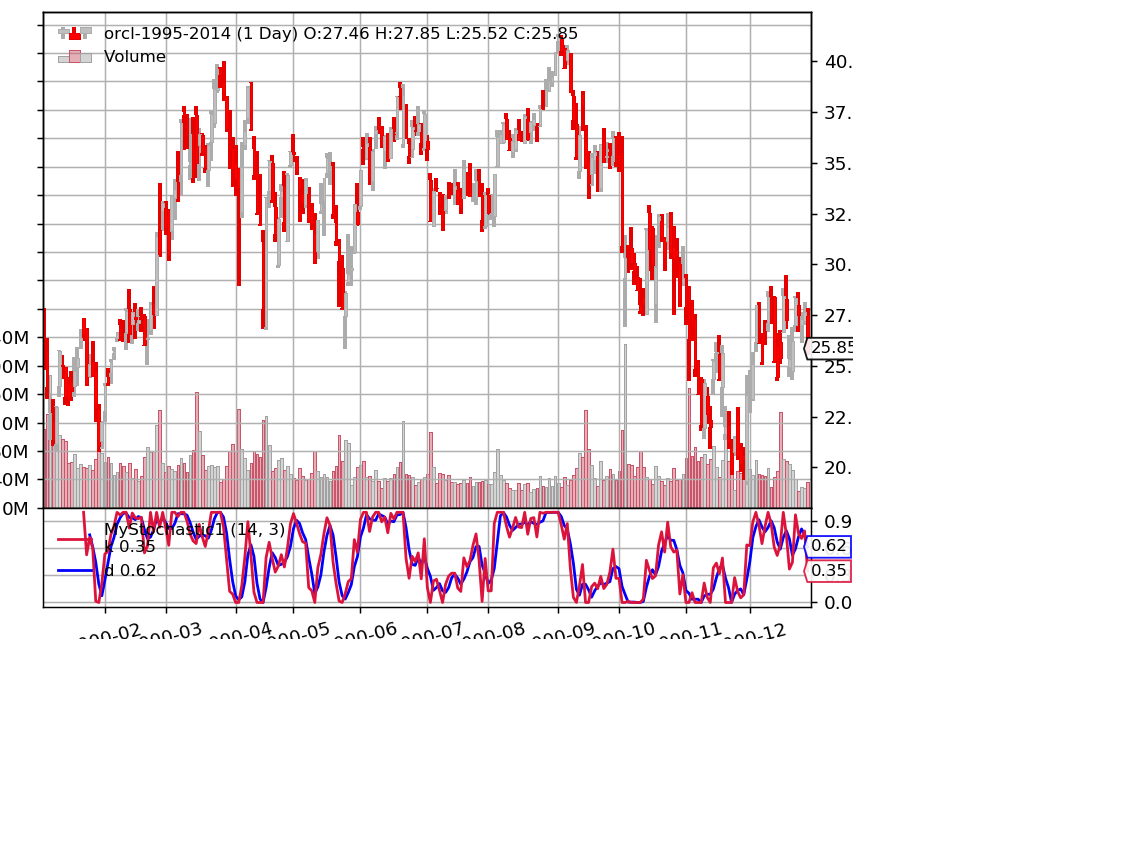

In [6]:
%matplotlib notebook
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  
import os.path  
import sys  


import backtrader as bt


class MyStochastic1(bt.Indicator):
    
    lines = ('k', 'd', )  # プロットに表示するlinesオブジェクト
    params = (
        ('k_period', 14), # パラメーターをタプルのタプルで指定する
        ('d_period', 3),  # タプルの最後にもコンマ(、)をいれる
    )
    
    def __init__(self):
        # 組み込みのインジケーターHighestで最高値を計算
        # 正確にはself.datas[0]と書くが省略可能 
        highest = bt.ind.Highest(self.data, period=self.p.k_period)
        
        # self.params.k_periodを省略してself.p.k_period     
        lowest = bt.ind.Lowest(self.data, period=self.p.k_period)        
                                                                         
        # つぎの計算のためself.lines.kをkに代入して簡略化
        self.lines.k = k = (self.data.close - lowest) / (highest - lowest)    
        self.lines.d = bt.ind.SMA(k, period=self.p.d_period)

        

class TestStrategy(bt.Strategy):
                
    def __init__(self):

        self.myind1 = MyStochastic1(self.data)    #インスタンス名myindの部分は任意
        
        
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(TestStrategy)

    datapath = 'C:\\Users\\shsh\\orcl-1995-2014.txt'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,        
        fromdate=datetime.datetime(2000, 1, 1),
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    cerebro.adddata(data)
    cerebro.run(stdstats=False)
    cerebro.plot(style='candle')

<IPython.core.display.Javascript object>


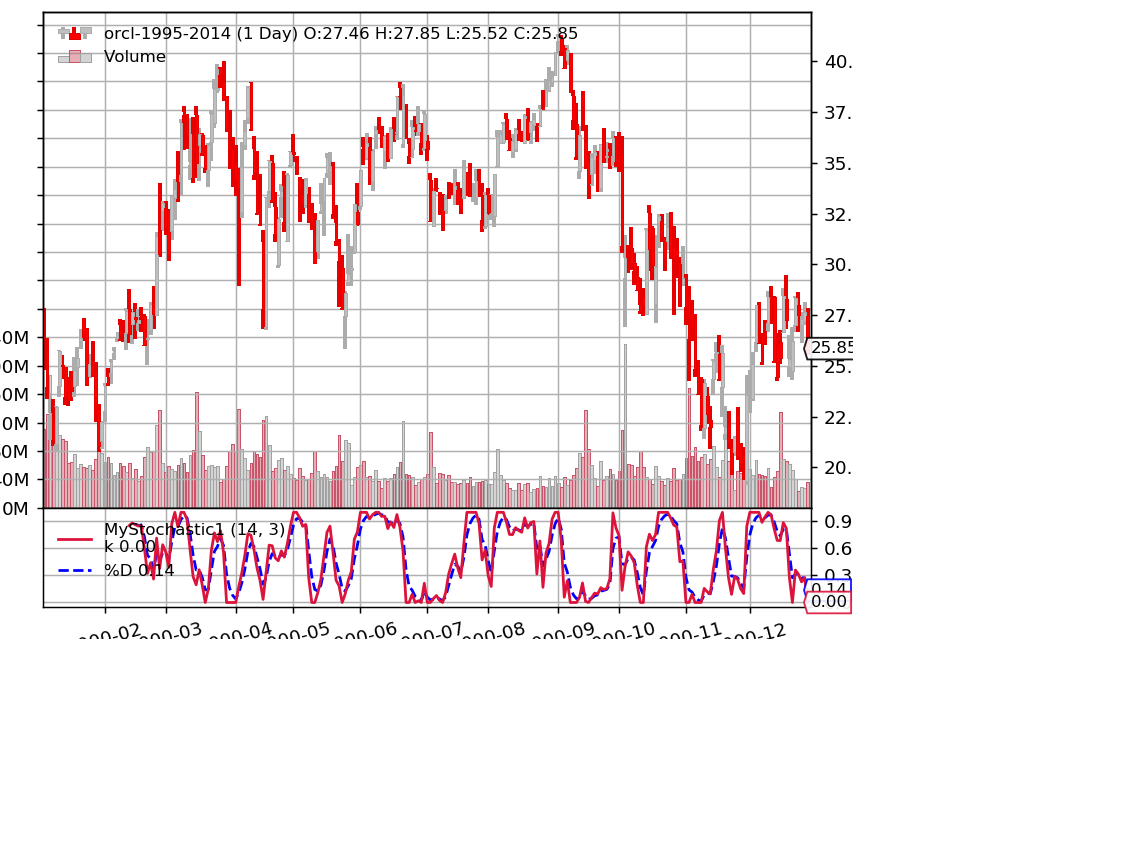

In [15]:
%matplotlib notebook
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  
import os.path  
import sys  


import backtrader as bt


class MyStochastic1(bt.Indicator):
    
    lines = ('k', 'ds', )  # プロットに表示するlinesオブジェクト
    params = (
        ('k_period', 14), # パラメーターをタプルのタプルで指定する
        ('d_period', 3),  # タプルの最後にもコンマ(、)をいれる
    )
    
    #省略
    #plot = dict()
    
    plotinfo = dict(plot   =True,
                    subplot=True,
                    plotname='',
               )
    
    plotlines = dict(K=dict(_name='%K',ls='--'), ds=dict(_name='%D',ls='--'))
    #plotlines = dict(K =dict(_name='%K'))

    def __init__(self):
        # 正確にはself.datas[0]と書くが省略可能 
        # self.params.k_periodを省略してself.p.k_period 
        highest = bt.ind.Highest(self.datas[0].high, period=self.p.k_period)
        lowest = bt.ind.Lowest(self.datas[0].low, period=self.p.k_period)        
        tmpk = (self.datas[0].close - lowest) / (highest - lowest)    
        #tmpd = bt.ind.SimpleMovingAverage(tmpk, period=self.p.d_period)
        tmpd = bt.ind.EMA(tmpk, period=self.p.d_period)

        highest2 = bt.ind.Highest(tmpd, period=self.p.k_period)
        lowest2 = bt.ind.Lowest(tmpd, period=self.p.k_period) 
        self.lines.k = (tmpd - lowest2) / (highest2 - lowest2) 
        self.lines.ds = bt.ind.EMA(self.lines.k, period=self.p.d_period)
        
    def __hilosearch():
        pass
    
class TestStrategy(bt.Strategy):
    def __init__(self):
        #インスタンス名myindの部分は任意
        self.myind1 = MyStochastic1(self.data)    
        
        
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(TestStrategy)

    datapath = 'C:\\Users\\shsh\\orcl-1995-2014.txt'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,        
        fromdate=datetime.datetime(2000, 1, 1),
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    cerebro.adddata(data)
    cerebro.run(stdstats=False)
    cerebro.plot(style='candle')